In [132]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols # Creating linear model
import scipy.stats as stats

In [315]:
# Reading the dataset
credit = pd.read_csv('credit_altered.csv')

In [373]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,RISK_VALUE_AVG,RISK_VALUE_CAT,AGE_CAT,LIMIT_BAL_CAT
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,-3102,-0.333333,1,1,L_M
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,-11395,0.500000,2_5,2,L_M
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,-66396,0.000000,1,6,L_M
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,-176956,0.000000,1,7,L_M
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,-42352,-0.333333,1,10,L_M


In [380]:
credit[(credit['PAY_AMT_APR']==0) | (credit['PAY_AMT_MAY']==0) | (credit['PAY_AMT_JUN']==0) | (credit['PAY_AMT_JUL']==0) | (credit['PAY_AMT_AUG']==0) & (credit['PAY_AMT_SEP']==0)]['DEFAULT'].value_counts()

0    8981
1    3899
Name: DEFAULT, dtype: int64

In [3]:
# subtracting the payment of this month to previous month's BILL
credit['BILL_PAY_VALUE'] = ((credit['PAY_AMT_SEP'] - credit['BILL_AMT_AUG']) + 
                            (credit['PAY_AMT_AUG'] - credit['BILL_AMT_JUL']) +
                           (credit['PAY_AMT_JUL'] - credit['BILL_AMT_JUN']) +
                           (credit['PAY_AMT_JUN'] - credit['BILL_AMT_MAY']) + 
                           (credit['PAY_AMT_MAY'] - credit['BILL_AMT_APR']))/5

In [316]:
# Payment status columns which have 0 or greater value are more prone to become a defaulter. 
# Let's sum all the Pay status and then look at the distribution for the Defaulter and non defaulter.
credit['RISK_VALUE_AVG'] = (credit['PAY_APR'] + credit['PAY_MAY'] + credit['PAY_JUN'] + credit['PAY_JUL'] + credit['PAY_AUG'] + credit['PAY_SEP'])/6
credit['RISK_VALUE'] = credit['PAY_APR'] + credit['PAY_MAY'] + credit['PAY_JUN'] + credit['PAY_JUL'] + credit['PAY_AUG'] + credit['PAY_SEP']

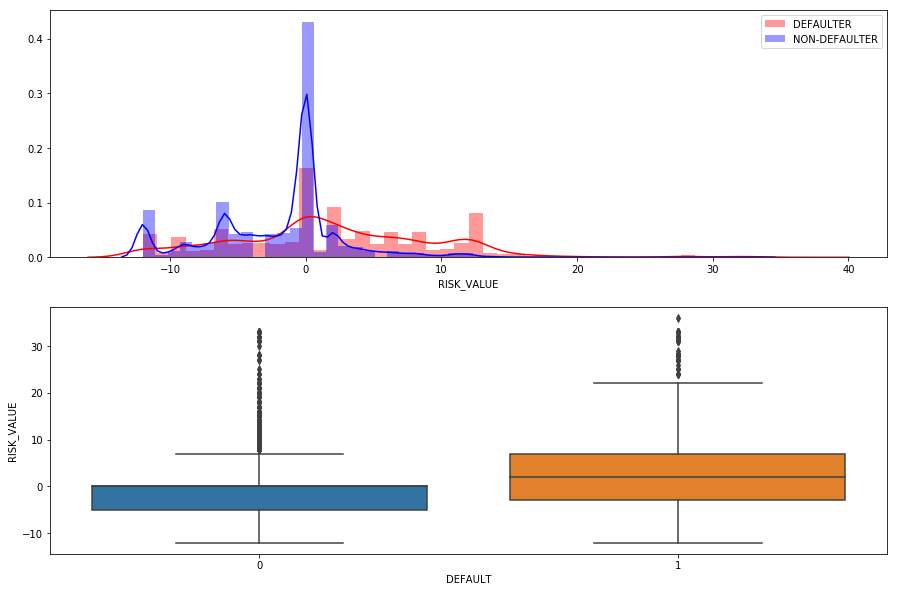

In [5]:
# Let's look at the distribution of the above feature created
plt.figure(figsize = (15,10))
# distribution plot
plt.subplot(211)
sns.distplot(credit[credit['DEFAULT']==1]['RISK_VALUE'], color = 'r', label = 'DEFAULTER')
sns.distplot(credit[credit['DEFAULT']==0]['RISK_VALUE'], color = 'b', label = 'NON-DEFAULTER')
plt.legend()
# boxplot
plt.subplot(212)
sns.boxplot(credit['DEFAULT'], credit['RISK_VALUE'])
plt.show()

- It can be seen that the values which are greater than 0 have more chances of being defaulter. It is quite separable.

In [6]:
# Let's check this new column affiliation with the columns with which it was created so we will drop those columns 
# and move only with this column
# Let's build a Linear model to check the statistics
model = ols('RISK_VALUE~PAY_APR+PAY_MAY+PAY_JUN+PAY_JUL+PAY_AUG+PAY_SEP', data = credit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RISK_VALUE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.424e+32
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:29:22   Log-Likelihood:             9.1178e+05
No. Observations:               30000   AIC:                        -1.824e+06
Df Residuals:                   29993   BIC:                        -1.823e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.504e-15    9.2e-17     38.099      0.000    3.32e-15    3.68e-15
PAY_APR        1.0000   1.36e-16   7.37e+15      0.000       1.000       1.000
PAY_MAY        1.0000   1.67e-16   5.99e+15      0.000       1.000       1.000
PAY_JUN        1.0000   1.55e-16   6.47e+15      0.000       1.000       1.000
PAY_JUL        1.0000   1.39e-16   7.18e+15      0.000       1.000       1.000
PAY_AUG        1.0000   1.29e-16   7.73e+15      0.000       1.000       1.000
PAY_SEP        1.0000   1.08e-16   9.26e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     4406.109   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18018.996
Skew:                          -0.684   Prob(JB):                         0.00
Kurtosis:                       6.541   Cond. No.                         5.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Drop the PAY_FLAG columns

## Another variable to check the bill value of the customer i.e. good customer or bad customer.

In [7]:
# Sum of average bill amounts for all the months divide by 6
credit['BILL_VALUE'] = (credit['BILL_AMT_APR'] + credit['BILL_AMT_MAY'] + credit['BILL_AMT_JUN'] + credit['BILL_AMT_JUL']
                        + credit['BILL_AMT_AUG'] + credit['BILL_AMT_SEP'])/6

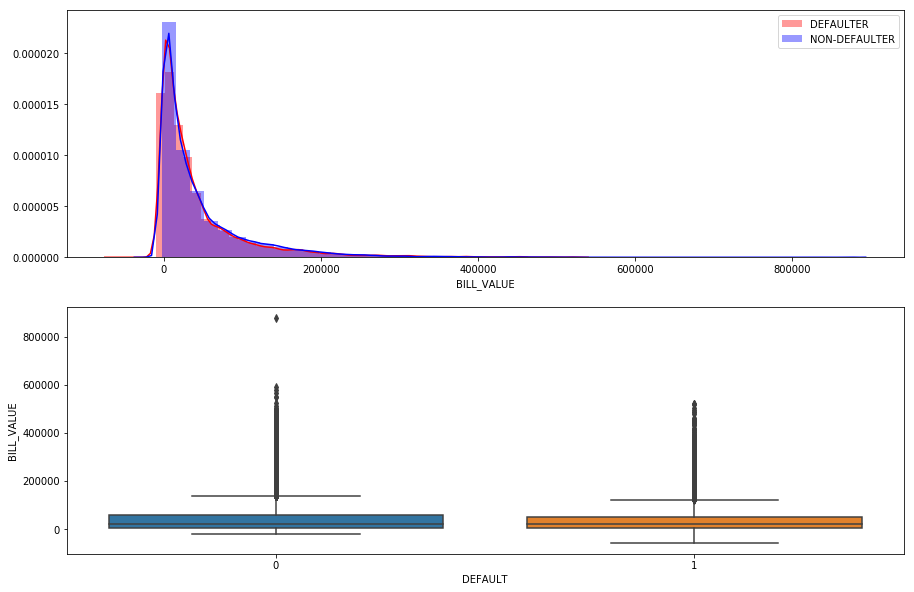

In [8]:
# Let's look at the distribution of the above feature created
plt.figure(figsize = (15,10))
# distribution plot
plt.subplot(211)
sns.distplot(credit[(credit['DEFAULT']==1)]['BILL_VALUE'], color = 'r', label = 'DEFAULTER')
sns.distplot(credit[(credit['DEFAULT']==0)]['BILL_VALUE'], color = 'b', label = 'NON-DEFAULTER')
plt.legend()
# boxplot
plt.subplot(212)
sns.boxplot(credit['DEFAULT'], credit['BILL_VALUE'])
plt.show()

In [9]:
credit[credit['BILL_VALUE']<0]['DEFAULT'].value_counts()

0    150
1     51
Name: DEFAULT, dtype: int64

- People with High negative value of BILL_VALUE are definitely defaulters.

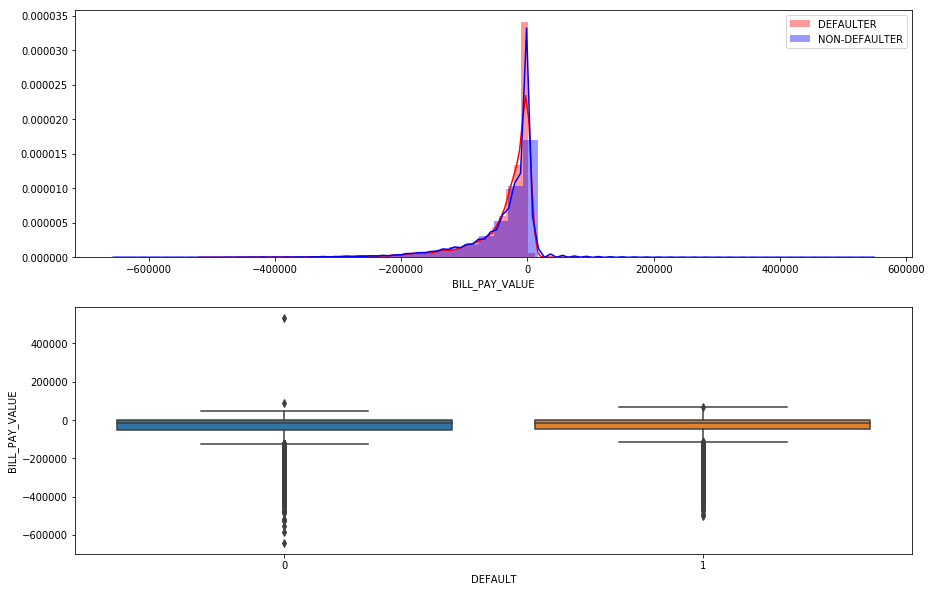

In [10]:
# Let's look at the distribution of the above feature created
plt.figure(figsize = (15,10))
# distribution plot
plt.subplot(211)
sns.distplot(credit[credit['DEFAULT']==1]['BILL_PAY_VALUE'], color = 'r', label = 'DEFAULTER')
sns.distplot(credit[credit['DEFAULT']==0]['BILL_PAY_VALUE'], color = 'b', label = 'NON-DEFAULTER')
plt.legend()
# boxplot
plt.subplot(212)
sns.boxplot(credit['DEFAULT'], credit['BILL_PAY_VALUE'])
plt.show()

In [386]:
credit[credit['BILL_PAY_VALUE']<-400000]['DEFAULT'].value_counts()

KeyError: 'BILL_PAY_VALUE'

- People with positive Pay value are more likely to default.
# This is one important feature as this has almost no defaulters on the negative side. The people who pay more than their bill are more likely to not default.

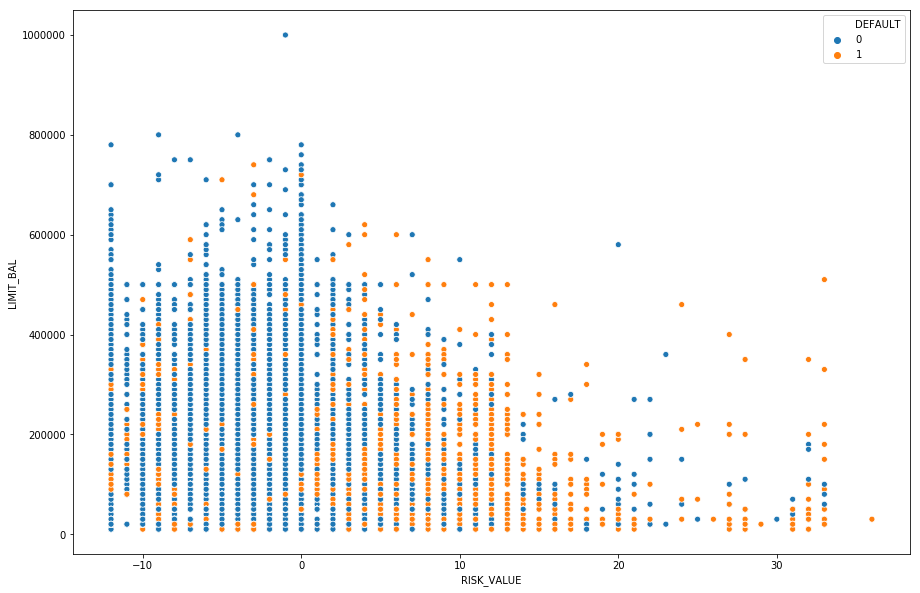

In [12]:
plt.figure(figsize = (15,10))

sns.scatterplot(credit['RISK_VALUE'], credit['LIMIT_BAL'], hue = credit['DEFAULT'])

- Limit balance has outliers. We can go with analysis only the the people who have LIMIT_BAL less than 600,000.

In [13]:
pd.set_option('display.max_columns', 500)
pd.DataFrame(credit.groupby('DEFAULT')['RISK_VALUE'].value_counts()).T

DEFAULT        0                                                             \
RISK_VALUE    0    -6    -12    2    -1   -4   -2   -5   -3   -9   -7    3    
RISK_VALUE  9062  2139  1825  1248  1143  980  917  898  882  605  533  426   

DEFAULT                                                                       \
RISK_VALUE  -8    4   -10   5    6    1    8    7    12   11  9  -11  10  13   
RISK_VALUE  411  378  242  231  231  201  172  170  148  147  93  71  61  33   

DEFAULT                                                                     \
RISK_VALUE  14  20  15  16  33  18  21  22  17  32  19  28  31  23  24  27   
RISK_VALUE  29  13  11  11   8   7   6   6   5   4   3   3   3   2   2   2   

DEFAULT                1                                                    \
RISK_VALUE  25  30    0    2    12  -6    4    6    8   -12  -9    3   -1    
RISK_VALUE   1   1  1130  635  453  357  339  319  315  284  262  227  195   

DEFAULT                                                                      \
RISK_VALUE  -4   -3    11   7    5   -2   -5    13   10  1  -7   9  -8  -10   
RISK_VALUE  183  179  176  173  168  167  163  112  100  97  93  93  78  51   

DEFAULT                                                                     \
RISK_VALUE  14  15  16  28  17 -11  32  18  20  33  27  19  31  21  24  22   
RISK_VALUE  50  44  37  24  20  17  16  15  13  11  10   8   6   4   4   3   

DEFAULT                     
RISK_VALUE  25  26  29  36  
RISK_VALUE   2   1   1   1

- As we can see clearly that for ***NON_DEFAULTERS*** most values are ***negative or 0***.
- For ***DEFAULTERS*** most values are ***greater than 0***.

### Payment value

In [14]:
# Sum of PAY amounts for all the months divide by Limit balance
credit['PAY_VALUE'] = (credit['PAY_AMT_APR'] + credit['PAY_AMT_MAY'] + credit['PAY_AMT_JUN'] + credit['PAY_AMT_JUL']
                        + credit['PAY_AMT_AUG'] + credit['PAY_AMT_SEP'])/6

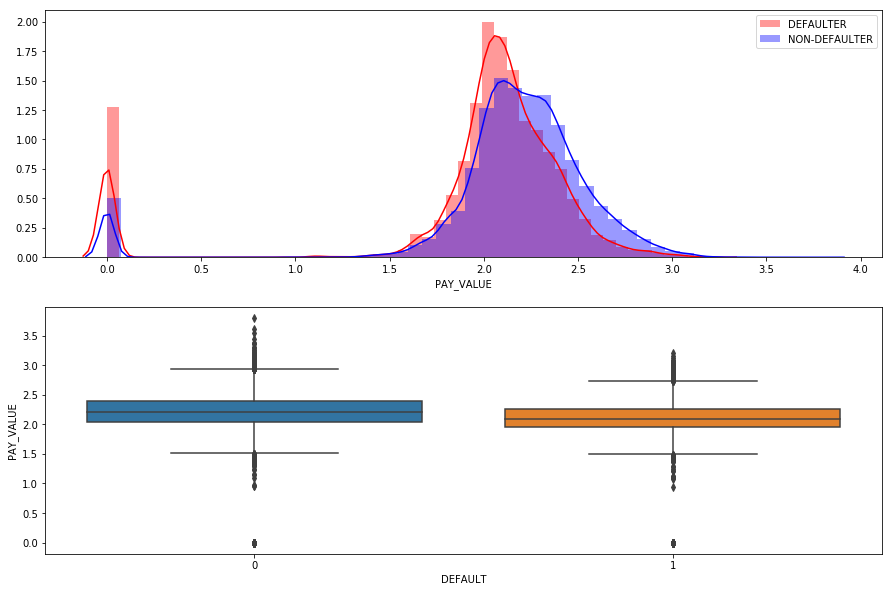

In [15]:
# Let's look at the distribution of the above feature created
plt.figure(figsize = (15,10))
# distribution plot
plt.subplot(211)
sns.distplot((credit[credit['DEFAULT']==1]['PAY_VALUE'])**0.1, color = 'r', label = 'DEFAULTER')
sns.distplot((credit[credit['DEFAULT']==0]['PAY_VALUE'])**0.1, color = 'b', label = 'NON-DEFAULTER')
plt.legend()
# boxplot
plt.subplot(212)
sns.boxplot(credit['DEFAULT'], (credit['PAY_VALUE'])**0.1)
plt.show()

- Not much separated so should not use it.
- But we can segment our modelling process for the one which have 0 value and other.

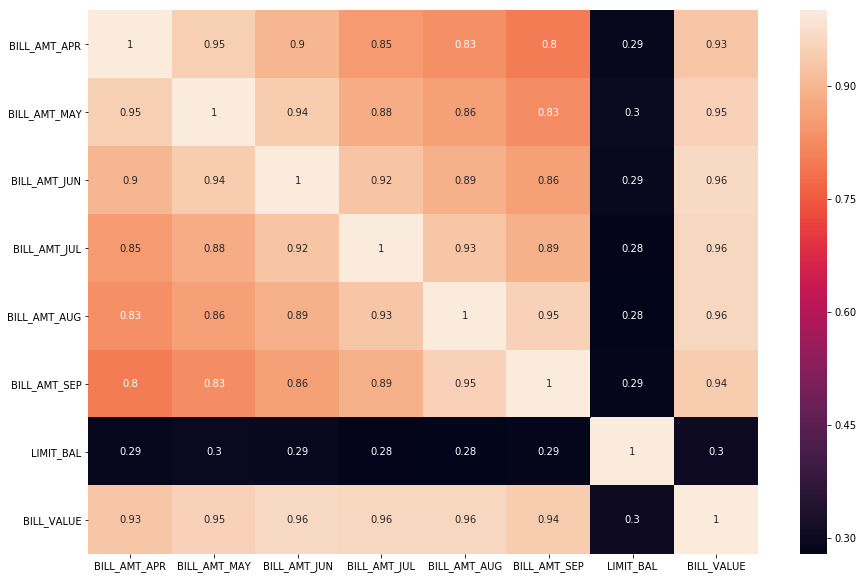

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(credit[['BILL_AMT_APR','BILL_AMT_MAY','BILL_AMT_JUN','BILL_AMT_JUL','BILL_AMT_AUG','BILL_AMT_SEP','LIMIT_BAL','BILL_VALUE']].corr(), annot = True)
plt.show()

#### We can do PCA on just these columns to get a column which will have value of the customers
#### Or we can just keep the BILL_VALUE column it will give us the most of information of all the bill amounts of every month.

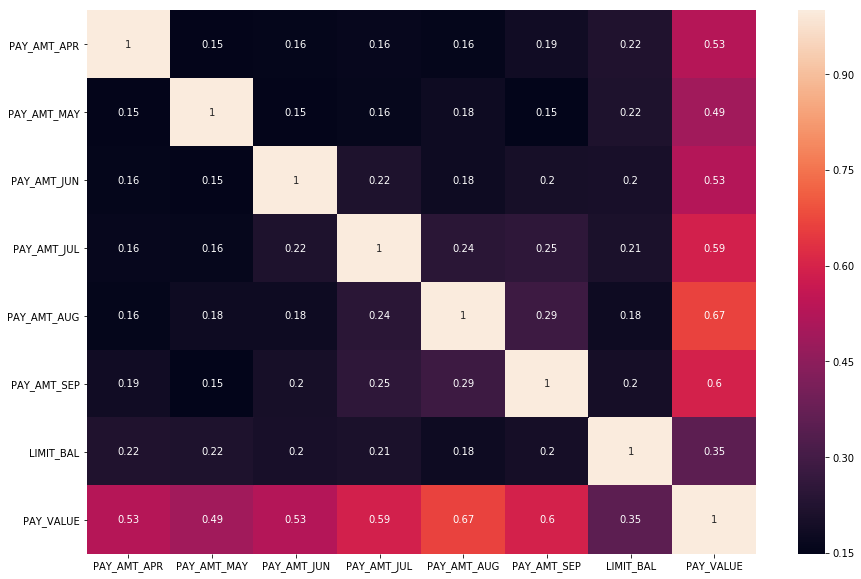

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(credit[['PAY_AMT_APR','PAY_AMT_MAY','PAY_AMT_JUN','PAY_AMT_JUL','PAY_AMT_AUG','PAY_AMT_SEP','LIMIT_BAL','PAY_VALUE']].corr(), annot = True)
plt.show()

### There is very less correlation between the Payment of every month.

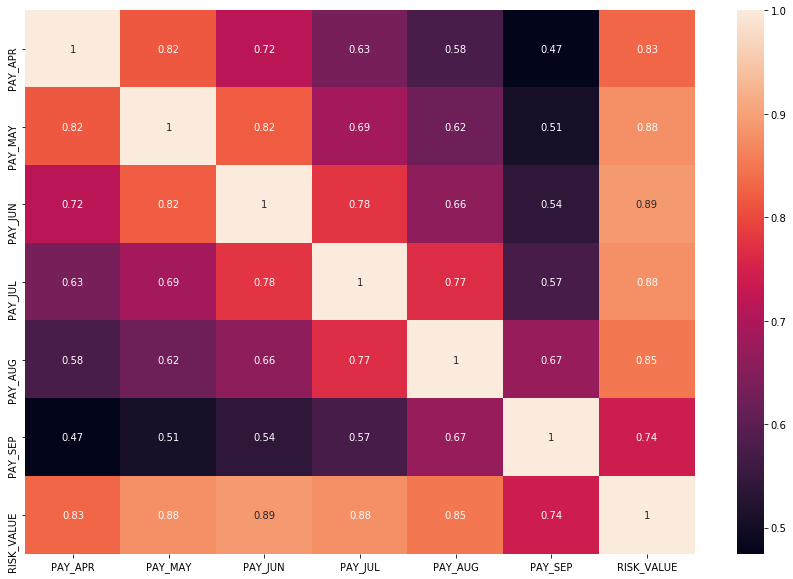

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(credit[['PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','PAY_SEP','RISK_VALUE']].corr(), annot = True)
plt.show()

# Credit Card Utilization Feature

# WOE on RISK_VALUE

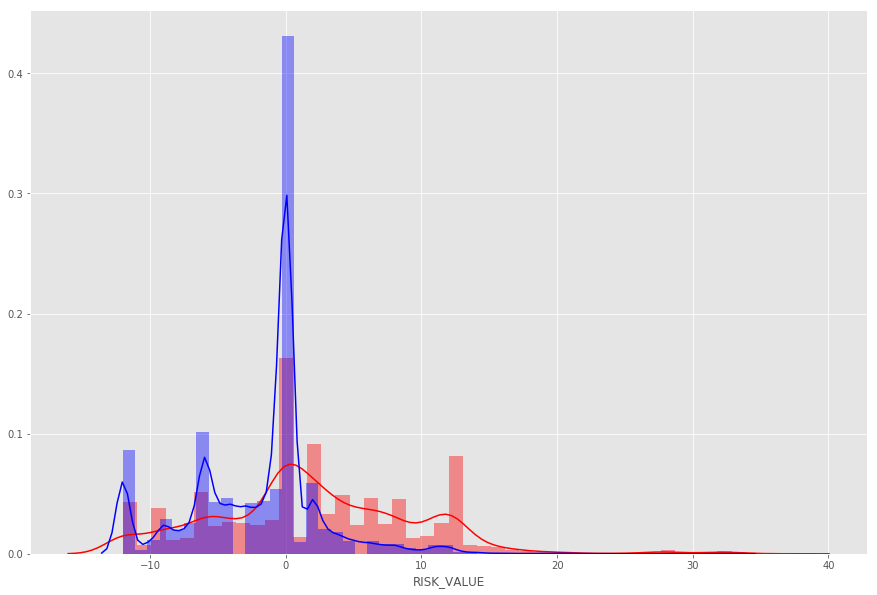

In [19]:
plt.style.use('ggplot')
plt.figure(figsize = (15,10))
sns.distplot(credit[credit['DEFAULT']==1]['RISK_VALUE'], color = 'r')
sns.distplot(credit[credit['DEFAULT']==0]['RISK_VALUE'], color = 'b')

In [317]:
credit['RISK_VALUE_CAT'] = pd.cut(credit['RISK_VALUE'], bins = [-50,1,5,10,100], 
                                  labels = ['1','2_5','6_10','10+'])

In [407]:
credit.groupby('DEFAULT')['RISK_VALUE_CAT'].value_counts()

DEFAULT  RISK_VALUE_CAT
0        1                 19909
         2_5                2283
         6_10                727
         10+                 445
1        1                  3256
         2_5                1369
         10+                1011
         6_10               1000
Name: RISK_VALUE_CAT, dtype: int64

In [131]:
np.log((19909/23364)/(3256/6336))

0.5057237209914274

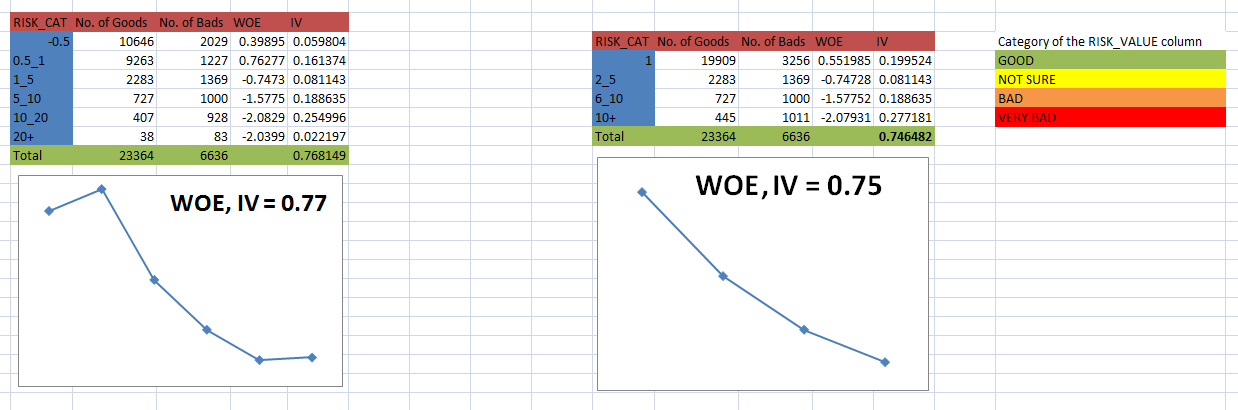

# WOE on AGE

In [22]:
credit['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [23]:
# 20 EPV(Events per predictor variable)
6636/23

288.5217391304348

- It is greater than 20 we have enough variables.

In [24]:
credit['AGE_CAT'] = pd.cut(credit['AGE'], bins=[0,25,34,44,100],labels=["0-25","26-34","36-44","44+"])

In [25]:
credit[credit['AGE_CAT']=="44+"]['DEFAULT'].value_counts()

0    3992
1    1294
Name: DEFAULT, dtype: int64

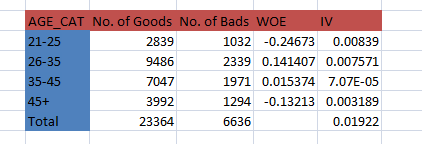

- This has very less information in it. Not of much use.

# LIMIT_BAL

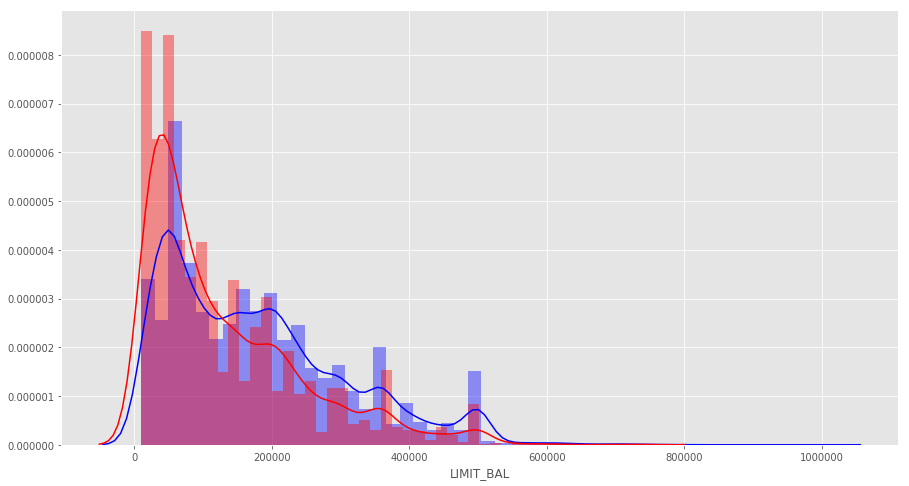

In [26]:
plt.figure(figsize = (15,8))
sns.distplot(credit[credit['DEFAULT']==0]['LIMIT_BAL'], color = 'b')
sns.distplot(credit[credit['DEFAULT']==1]['LIMIT_BAL'], color = 'r')

In [408]:
credit['LIMIT_BAL_CAT'] = pd.cut(credit['LIMIT_BAL'], bins=[0,49000,150000,600000,1500000],labels=["LOW","L_M","MEDIUM","HIGH"])

In [410]:
credit[credit['LIMIT_BAL_CAT']=='L_M']['DEFAULT'].value_counts()

0    9135
1    2954
Name: DEFAULT, dtype: int64

In [188]:
np.log((11400/23364)/(2121/6336))

0.376776958151966

In [83]:
np.log((8814/23364)/(3684/6636)), np.log((20425/23364)/(5058/6636))

(-0.38634475582313, 0.13710148864842822)

In [196]:
credit.groupby('EDUCATION')['DEFAULT'].value_counts()

EDUCATION    DEFAULT
Graduate     0           8549
             1           2036
High School  0           3680
             1           1237
Others       0            116
             1              7
University   0          10700
             1           3330
Unknown      0            319
             1             26
Name: DEFAULT, dtype: int64

# Utilisation of every month

In [382]:
credit['UTILISATION_JUN'] = credit['BILL_AMT_JUN']/credit['LIMIT_BAL']
credit['UTILISATION_JUL'] = credit['BILL_AMT_JUL']/credit['LIMIT_BAL']
credit['UTILISATION_AUG'] = credit['BILL_AMT_AUG']/credit['LIMIT_BAL']
credit['UTILISATION_SEP'] = credit['BILL_AMT_SEP']/credit['LIMIT_BAL']

In [383]:
print(credit[credit['UTILISATION_AUG']>1]['DEFAULT'].value_counts())
print(credit[credit['UTILISATION_JUL']>1]['DEFAULT'].value_counts())
print(credit[credit['UTILISATION_SEP']>1]['DEFAULT'].value_counts())

0    1328
1     612
Name: DEFAULT, dtype: int64
0    1096
1     487
Name: DEFAULT, dtype: int64
0    1479
1     636
Name: DEFAULT, dtype: int64


In [385]:
credit.iloc[credit[(credit['UTILISATION_AUG']>1) & (credit['DEFAULT']==0)].index]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,RISK_VALUE_AVG,RISK_VALUE_CAT,AGE_CAT,LIMIT_BAL_CAT,UTILISATION_JUN,UTILISATION_JUL,UTILISATION_AUG,UTILISATION_SEP
5,6,50000,Male,Graduate,Single,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,0,-166742,0.000000,1,7,L_M,0.387880,1.152160,1.141380,1.288000
61,62,70000,Male,University,Married,39,0,0,0,0,0,-1,70800,72060,69938,16518,14096,830,4025,2095,1000,2000,3000,0,0,-1,-161322,-0.166667,1,7,L_M,0.235971,0.999114,1.029429,1.011429
108,109,130000,Male,University,Single,38,0,0,0,-1,-1,-1,171438,178382,39940,120483,44127,126568,10908,0,133657,4566,133841,4796,0,-3,-226528,-0.500000,1,7,L_M,0.926792,0.307231,1.372169,1.318754
129,130,60000,Male,High School,Married,55,3,2,2,0,0,0,60521,61450,57244,28853,29510,26547,2504,7,1200,1200,1100,1500,0,7,-197593,1.166667,6_10,10,L_M,0.480883,0.954067,1.024167,1.008683
139,140,50000,Male,Graduate,Single,24,0,0,0,0,0,0,50801,50143,49586,19430,19375,18995,2360,1700,1000,900,870,2130,0,0,-150699,0.000000,1,1,L_M,0.388600,0.991720,1.002860,1.016020
179,180,80000,Female,University,Married,29,0,0,2,0,0,0,77883,81811,80250,61467,10662,11486,5800,1000,600,400,1000,0,0,2,-236876,0.333333,2_5,4,L_M,0.768338,1.003125,1.022638,0.973537
189,190,20000,Female,University,Single,31,1,5,4,4,3,2,21703,21087,21461,20835,20219,20487,0,1000,0,0,760,0,0,19,-102329,3.166667,10+,5,L_M,1.041750,1.073050,1.054350,1.085150
205,206,20000,Male,High School,Married,43,-1,-1,0,0,0,0,227,20351,20237,19339,19450,19337,22359,1305,1258,1459,3457,1700,0,-2,-68876,-0.333333,1,8,L_M,0.966950,1.011850,1.017550,0.011350
221,222,330000,Female,High School,Single,45,0,0,0,0,0,0,335196,334954,335527,333860,335760,330121,12388,12378,12116,12450,12213,11678,0,0,-1608677,0.000000,1,9,MEDIUM,1.011697,1.016748,1.015012,1.015745
245,246,20000,Female,University,Single,40,0,0,0,0,0,-2,19816,20396,20102,19575,0,0,1601,2203,2114,0,0,0,0,-2,-54155,-0.333333,1,8,L_M,0.978750,1.005100,1.019800,0.990800


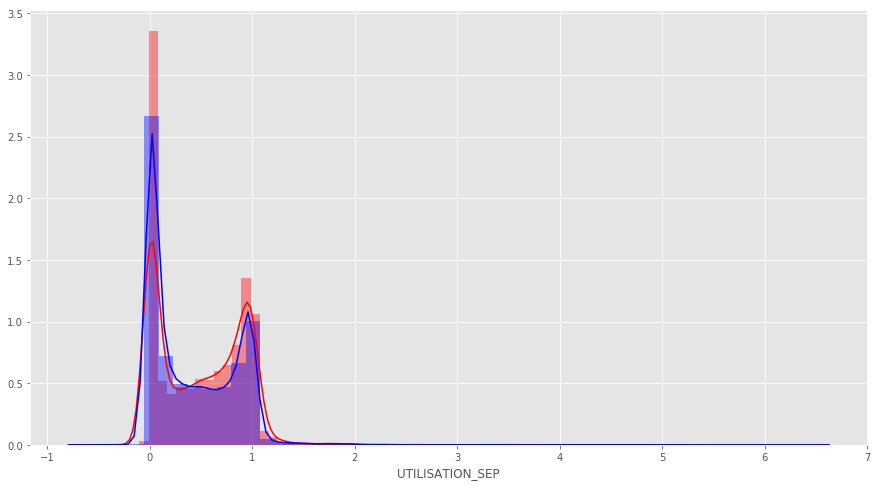

In [106]:
plt.figure(figsize = (15,8))
sns.distplot(credit[credit['DEFAULT']==1]['UTILISATION_SEP'], color = 'r')
sns.distplot(credit[credit['DEFAULT']==0]['UTILISATION_SEP'], color = 'b')

In [100]:
credit['UTILISATION_TOTAL'] = credit['UTILISATION_SEP'] + credit['UTILISATION_AUG'] + credit['UTILISATION_JUN'] + credit['UTILISATION_JUL']

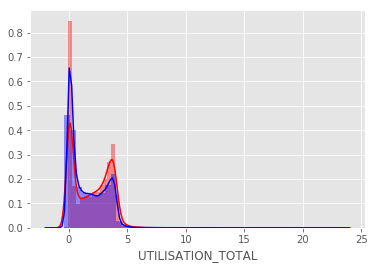

In [101]:
sns.distplot(credit[credit['DEFAULT']==1]['UTILISATION_TOTAL'], color = 'r')
sns.distplot(credit[credit['DEFAULT']==0]['UTILISATION_TOTAL'], color = 'b')

In [112]:
credit[credit['UTILISATION_SEP']>1]['DEFAULT'].value_counts()

0    1479
1     636
Name: DEFAULT, dtype: int64

In [113]:
(1479/23364)/(636/6336)

0.6306363927086664

In [114]:
np.log(3)

1.0986122886681098

In [215]:
stats.boxcox((credit['PAY_AMT_SEP']+0.001))[1]

0.20378946317817886

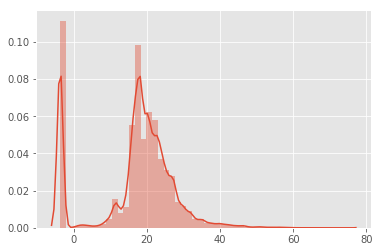

In [138]:
sns.distplot(stats.boxcox((credit['PAY_AMT_SEP']+0.001))[0])

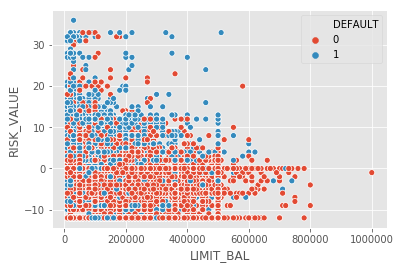

In [197]:
sns.scatterplot(credit['LIMIT_BAL'], credit['RISK_VALUE'], hue = credit['DEFAULT'])

In [204]:
credit['RISK_VALUE'].min()

-2.0

In [229]:
credit['BAL_RISK_AVG'] = credit['LIMIT_BAL']/(credit['RISK_VALUE_AVG']+4)
credit['BAL_RISK'] = credit['LIMIT_BAL']/(credit['RISK_VALUE']+14)

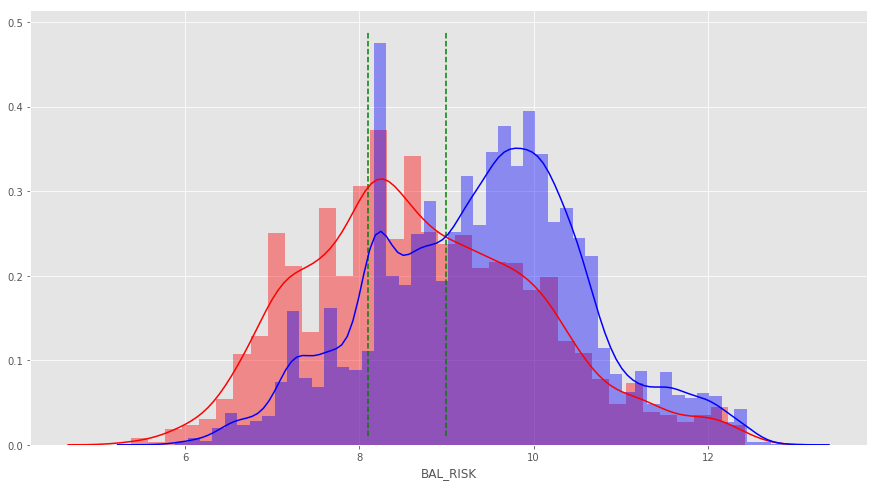

In [257]:
plt.figure(figsize = (15,8))
sns.distplot(np.log(credit[credit['DEFAULT']==1]['BAL_RISK']), color = 'r')
sns.distplot(np.log(credit[credit['DEFAULT']==0]['BAL_RISK']), color = 'b')
plt.vlines(x = 9,ymin = 0.01, ymax = 0.49, linestyles='--', color = 'g')
plt.vlines(x = 8.1,ymin = 0.01, ymax = 0.49, linestyles='--', color = 'g')

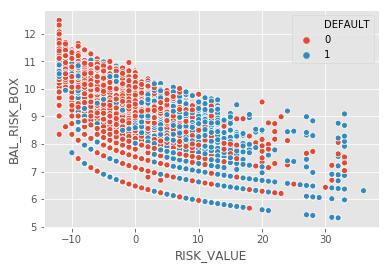

In [312]:
sns.scatterplot(credit['RISK_VALUE'], credit['BAL_RISK_BOX'], hue = credit['DEFAULT'])

#### BOXCOX on this BAL_RISK Column

In [246]:
credit['BAL_RISK_BOX'] = stats.boxcox(credit['BAL_RISK'])[0]

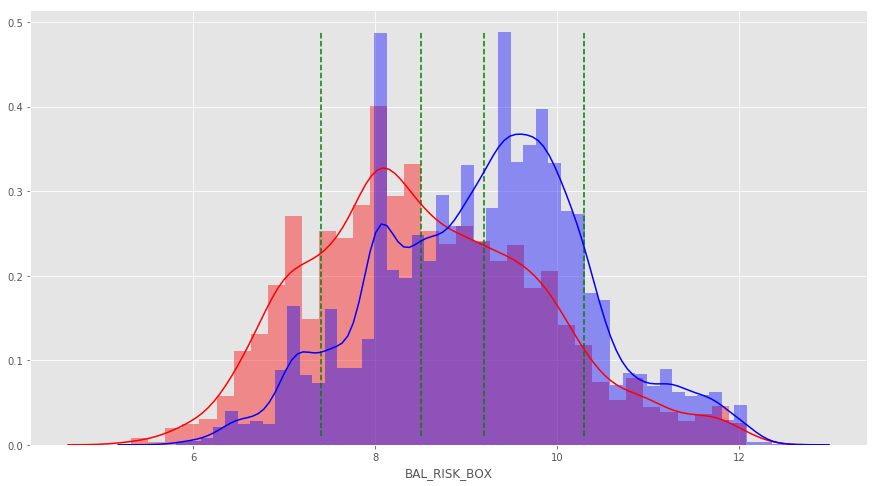

In [276]:
plt.figure(figsize = (15,8))
sns.distplot(credit[credit['DEFAULT']==1]['BAL_RISK_BOX'], color = 'r')
sns.distplot(credit[credit['DEFAULT']==0]['BAL_RISK_BOX'], color = 'b')
plt.vlines(x = 9.2,ymin = 0.01, ymax = 0.49, linestyles='--', color = 'g')
plt.vlines(x = 8.5,ymin = 0.01, ymax = 0.49, linestyles='--', color = 'g')
plt.vlines(x = 7.4,ymin = 0.01, ymax = 0.49, linestyles='--', color = 'g')
plt.vlines(x = 10.3,ymin = 0.01, ymax = 0.49, linestyles='--', color = 'g')

In [266]:
credit['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [278]:
credit[(credit['BAL_RISK_BOX']>10.3)]['DEFAULT'].value_counts()

0    3487
1     601
Name: DEFAULT, dtype: int64

In [252]:
credit['BAL_RISK_BOX'].quantile(.75)

9.891893277644325

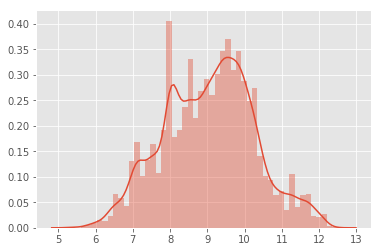

In [239]:
sns.distplot(stats.boxcox(credit['BAL_RISK'])[0])

In [ ]:
credit['BAL_RISK_CAT'] = pd.cut(credit['BAL_RISK'], bins = [])

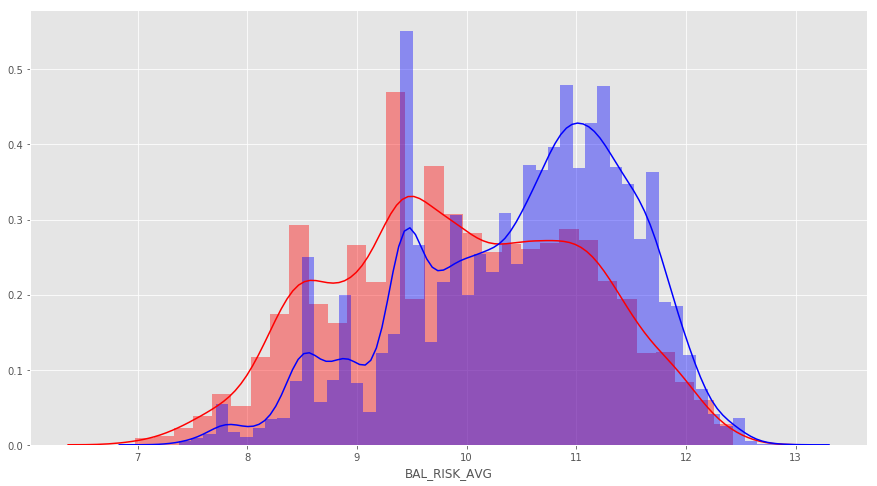

In [210]:
plt.figure(figsize = (15,8))
sns.distplot(np.log(credit[credit['DEFAULT']==1]['BAL_RISK_AVG']), color = 'r')
sns.distplot(np.log(credit[credit['DEFAULT']==0]['BAL_RISK_AVG']), color = 'b')

In [222]:
# plt.figure(figsize = (15,8))
# sns.scatterplot((credit['PAY_AMT_MAY']-credit['BILL_AMT_APR']),credit['PAY_APR'], hue = credit['DEFAULT'])

In [221]:
# plt.figure(figsize = (15,8))
# sns.distplot((credit[credit['DEFAULT']==1]['PAY_AMT_MAY']-credit[credit['DEFAULT']==1]['BILL_AMT_APR'])/(credit[credit['DEFAULT']==1]['PAY_APR']+4), color = 'r')
# sns.distplot((credit[credit['DEFAULT']==0]['PAY_AMT_MAY']-credit[credit['DEFAULT']==0]['BILL_AMT_APR'])/(credit[credit['DEFAULT']==0]['PAY_APR']+4), color = 'b')

## PAY_AMT/BILL_AMT

In [289]:
(credit['BILL_AMT_APR'] + credit['BILL_AMT_MAY'] + credit['BILL_AMT_JUN'] + credit['BILL_AMT_JUL'] + credit['BILL_AMT_AUG'] + credit['BILL_AMT_SEP']).min()

-336259

In [300]:
credit['PAY_BILL_RATIO'] = ((credit['BILL_AMT_APR'] + credit['BILL_AMT_MAY'] + credit['BILL_AMT_JUN'] + 
                             credit['BILL_AMT_JUL'] + credit['BILL_AMT_AUG'] + credit['BILL_AMT_SEP'])+336260)/((credit['PAY_AMT_APR'] + credit['PAY_AMT_MAY'] + credit['PAY_AMT_JUN'] + credit['PAY_AMT_JUL'] + credit['PAY_AMT_AUG'] + credit['PAY_AMT_SEP'])+0.001)

In [309]:
credit['PAY_BILL_RATIO'] = (credit['PAY_AMT_MAY']+0.01)/(credit['BILL_AMT_MAY']+339604)

In [302]:
credit['BILL_AMT_APR'].min()

-339603

In [292]:
credit[credit['PAY_BILL_RATIO']==credit['PAY_BILL_RATIO'].max()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,BILL_PAY_VALUE,PAY_VALUE,RISK_VALUE_CAT,AGE_CAT,LIMIT_BAL_CAT,UTILISATION_JUN,UTILISATION_JUL,UTILISATION_AUG,UTILISATION_SEP,UTILISATION_TOTAL,BAL_RISK,RISK_VALUE_AVG,BAL_RISK_AVG,BAL_RISK_BOX,PAY_BILL_RATIO
290,291,280000,Male,Graduate,Single,33,-1,-1,-1,-1,-1,-1,898,898,325,898,325,-339603,898,325,898,325,0,345293,1,-6,-56043.166667,67920.6,57956.5,1,26-34,MEDIUM,0.003207,0.001161,0.003207,0.003207,0.010782,35000.0,-1.0,93333.333333,10.212637,347739.001


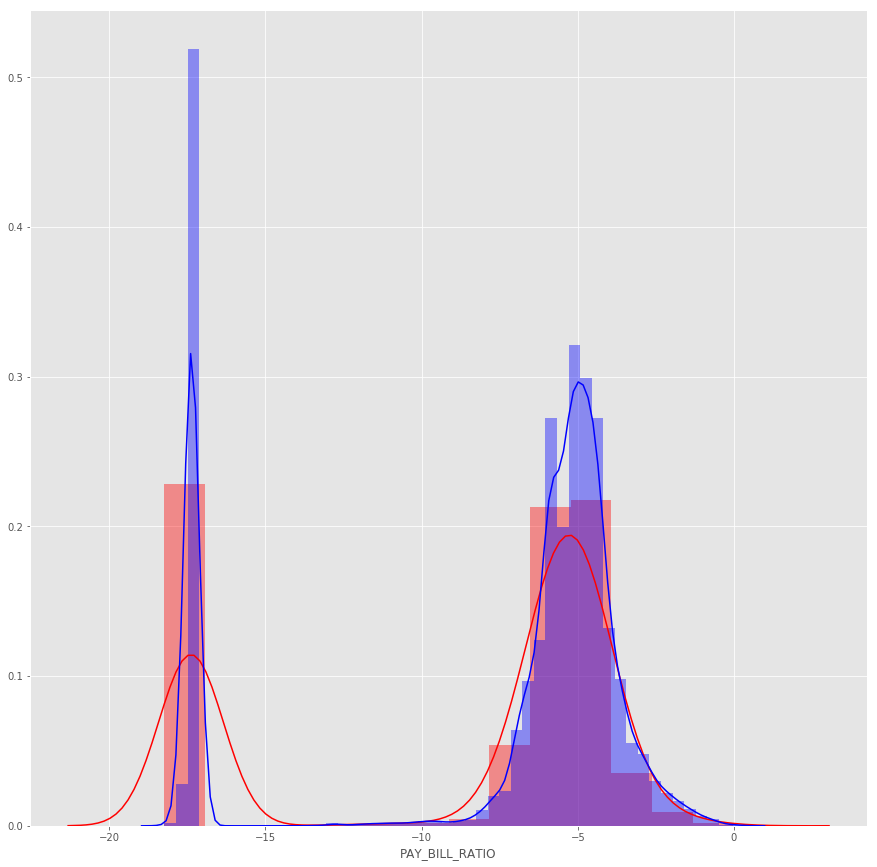

In [310]:
plt.figure(figsize = (15,15))
sns.distplot(np.log(credit[credit['DEFAULT']==1]['PAY_BILL_RATIO']), color = 'r')
sns.distplot(np.log(credit[credit['DEFAULT']==0]['PAY_BILL_RATIO']), color = 'b')

In [ ]:
RISK_VALUE_AVG BAL_RISK_AVG

In [313]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,BILL_PAY_VALUE,PAY_VALUE,RISK_VALUE_CAT,AGE_CAT,LIMIT_BAL_CAT,UTILISATION_JUN,UTILISATION_JUL,UTILISATION_AUG,UTILISATION_SEP,UTILISATION_TOTAL,BAL_RISK,RISK_VALUE_AVG,BAL_RISK_AVG,BAL_RISK_BOX,PAY_BILL_RATIO
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,1284.000000,-620.4,114.833333,1,0-25,L_M,0.000000,0.034450,0.155100,0.195650,0.385200,1666.666667,-0.333333,5454.545455,7.292077,2.944606e-08
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,2846.166667,-2279.0,833.333333,2_5,26-34,L_M,0.027267,0.022350,0.014375,0.022350,0.086342,7058.823529,0.500000,26666.666667,8.681912,2.914950e-08
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,16942.166667,-13279.2,1836.333333,1,26-34,L_M,0.159233,0.150656,0.155856,0.324878,0.790622,6428.571429,0.000000,22500.000000,8.592143,2.820489e-03
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,38555.666667,-35391.2,1398.000000,1,36-44,L_M,0.566280,0.985820,0.964660,0.939800,3.456560,3571.428571,0.000000,12500.000000,8.027069,2.900481e-03
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,18223.166667,-8470.4,9841.500000,1,44+,L_M,0.418800,0.716700,0.113400,0.172340,1.421240,4166.666667,-0.333333,13636.363636,8.175413,1.920585e-03


In [318]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
ID                30000 non-null int64
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null object
EDUCATION         30000 non-null object
MARRIAGE          30000 non-null object
AGE               30000 non-null int64
PAY_SEP           30000 non-null int64
PAY_AUG           30000 non-null int64
PAY_JUL           30000 non-null int64
PAY_JUN           30000 non-null int64
PAY_MAY           30000 non-null int64
PAY_APR           30000 non-null int64
BILL_AMT_SEP      30000 non-null int64
BILL_AMT_AUG      30000 non-null int64
BILL_AMT_JUL      30000 non-null int64
BILL_AMT_JUN      30000 non-null int64
BILL_AMT_MAY      30000 non-null int64
BILL_AMT_APR      30000 non-null int64
PAY_AMT_SEP       30000 non-null int64
PAY_AMT_AUG       30000 non-null int64
PAY_AMT_JUL       30000 non-null int64
PAY_AMT_JUN       30000 non-null int64
PAY_AMT_MAY       30000 non-nu

In [344]:
df = credit.drop(columns = ['RISK_VALUE_AVG', 'RISK_VALUE', 'ID', 'BILL_VALUE'])

In [345]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'DEFAULT',
       'RISK_VALUE_CAT'],
      dtype='object')

In [346]:
df_dummy = pd.get_dummies(df,drop_first=True)

In [347]:
df_dummy.shape

(30000, 32)

In [329]:
from sklearn.model_selection import train_test_split

In [348]:
df_train, df_test = train_test_split(df_dummy, test_size = 0.3, random_state =42)

In [349]:
from sklearn.preprocessing import MinMaxScaler

In [350]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(df_train.drop(columns = 'DEFAULT'))
ytrain = df_train['DEFAULT']
xtest = scaler.transform(df_test.drop(columns = 'DEFAULT'))
ytest = df_test['DEFAULT']

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [335]:
from sklearn.linear_model import LogisticRegression

In [351]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [352]:
ypred = lr.predict(xtest)

In [358]:
lr.predict_proba(xtest)

array([[0.8538822 , 0.1461178 ],
       [0.88887198, 0.11112802],
       [0.86212366, 0.13787634],
       ...,
       [0.85343034, 0.14656966],
       [0.88540738, 0.11459262],
       [0.86901665, 0.13098335]])

In [353]:
from sklearn import metrics

In [354]:
metrics.accuracy_score(ytest,ypred)

0.812

In [355]:
metrics.confusion_matrix(ytest, ypred)

array([[6698,  342],
       [1350,  610]], dtype=int64)

In [356]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7040
           1       0.64      0.31      0.42      1960

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.74      0.63      0.65      9000
weighted avg       0.79      0.81      0.79      9000



In [ ]:
metrics.accuracy_score(ytest,ypred)

In [359]:
ypred = lr.predict(xtrain)

In [358]:
lr.predict_proba(xtest)

array([[0.8538822 , 0.1461178 ],
       [0.88887198, 0.11112802],
       [0.86212366, 0.13787634],
       ...,
       [0.85343034, 0.14656966],
       [0.88540738, 0.11459262],
       [0.86901665, 0.13098335]])

In [353]:
from sklearn import metrics

In [360]:
metrics.accuracy_score(ytrain,ypred)

0.8155238095238095

In [355]:
metrics.confusion_matrix(ytest, ypred)

array([[6698,  342],
       [1350,  610]], dtype=int64)

In [356]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7040
           1       0.64      0.31      0.42      1960

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.74      0.63      0.65      9000
weighted avg       0.79      0.81      0.79      9000



In [362]:
lr.score(xtrain,ytrain)

0.8155238095238095

In [363]:
lr.score(xtest,ytest)

0.812

In [364]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'DEFAULT', 'RISK_VALUE',
       'BILL_VALUE', 'RISK_VALUE_AVG', 'RISK_VALUE_CAT'],
      dtype='object')

In [366]:
credit['AGE_CAT'] = pd.cut(credit['AGE'], bins = [0,24,26,28,30,33,36,39,43,48,79], labels = [1,2,3,4,5,6,7,8,9,10])

In [369]:
credit.groupby('AGE_CAT')['DEFAULT'].value_counts()

AGE_CAT  DEFAULT
1        0          1955
         1           730
2        0          1887
         1           555
3        0          2287
         1           599
4        0          2413
         1           587
5        0          2852
         1           669
6        0          2672
         1           711
7        0          2317
         1           622
8        0          2451
         1           707
9        0          2195
         1           659
10       0          2335
         1           797
Name: DEFAULT, dtype: int64

In [387]:
from mpl_toolkits.mplot3d import Axes3D

sequence_containing_x_vals = list(range(0, 100))
sequence_containing_y_vals = list(range(0, 100))
sequence_containing_z_vals = list(range(0, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()

In [398]:
credit['UTILISATION_AUG'].min()

-1.39554

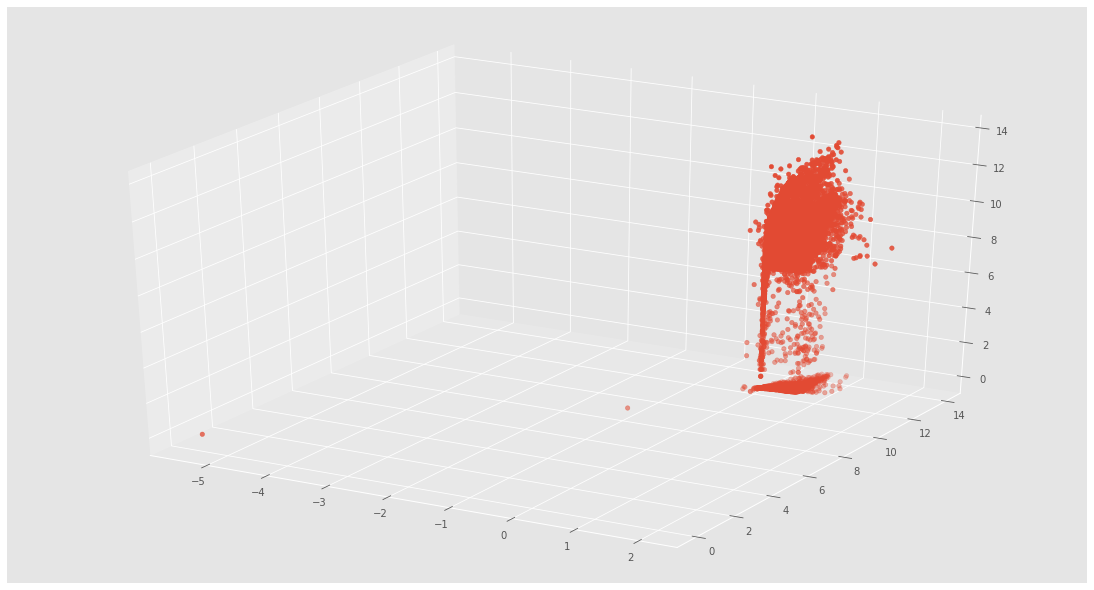

In [400]:
fig = plt.figure(figsize = (15,8))
ax = Axes3D(fig)

xvals = np.log(credit['UTILISATION_AUG']+1.4)
yvals = np.log(credit['BILL_AMT_AUG']+69778)
zvals = np.log(credit['PAY_AMT_SEP']+1)

ax.scatter(xvals, yvals, zvals)
plt.show()

C:\Users\Dharmendra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


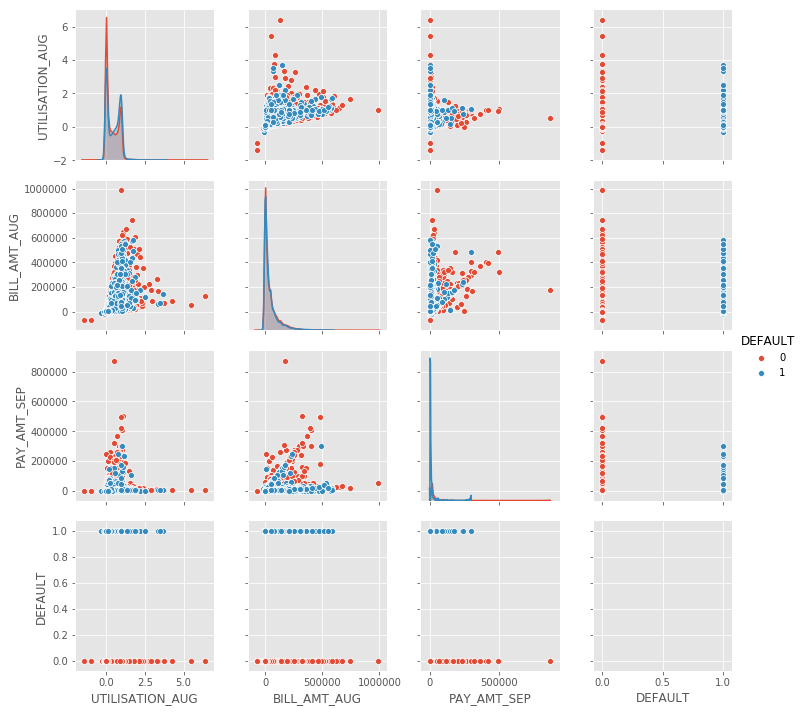

In [395]:
sns.pairplot(credit[['UTILISATION_AUG','BILL_AMT_AUG', 'PAY_AMT_SEP','DEFAULT']], diag_kind='kde', hue = 'DEFAULT')

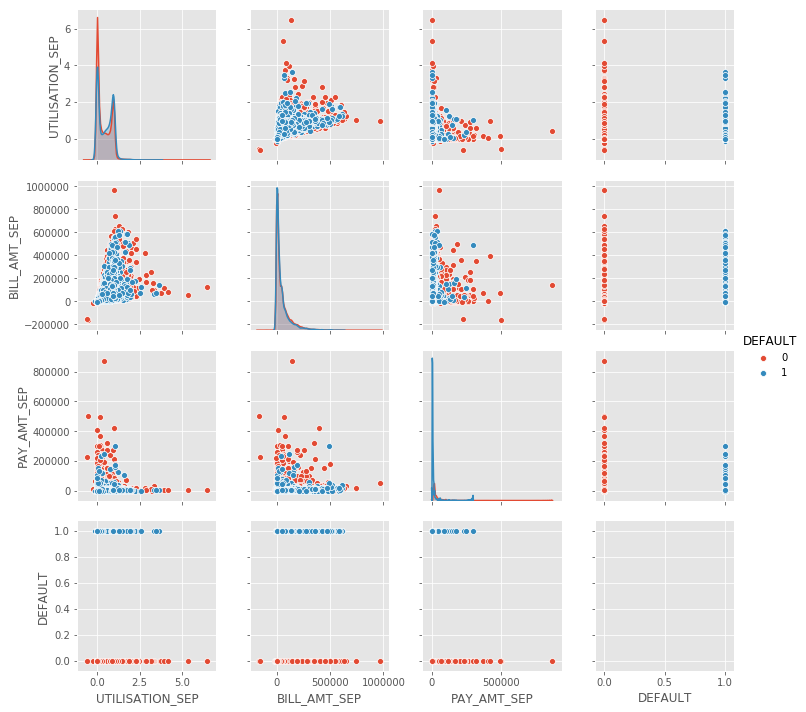

In [396]:
sns.pairplot(credit[['UTILISATION_SEP','BILL_AMT_SEP', 'PAY_AMT_SEP','DEFAULT']], diag_kind='kde', hue = 'DEFAULT')

In [401]:
credit['UTILISATION_AUG_LOG'] = xvals
credit['BILL_AMT_AUG_LOG'] = yvals
credit['PAY_AMT_SEP_LOG'] = zvals

In [413]:
credit['LIMIT_BAL_CAT'].unique()

[LOW, L_M, MEDIUM, HIGH]
Categories (4, object): [LOW < L_M < MEDIUM < HIGH]

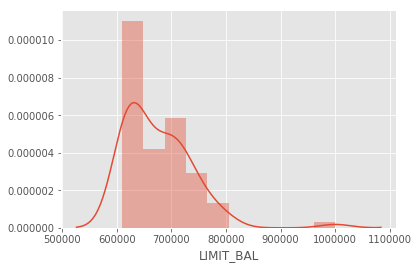

In [419]:
sns.distplot(credit[credit['LIMIT_BAL_CAT']=='HIGH']['LIMIT_BAL'])

In [422]:
credit[(credit['LIMIT_BAL']>600000) & (credit['LIMIT_BAL']<800000)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,RISK_VALUE_AVG,RISK_VALUE_CAT,AGE_CAT,LIMIT_BAL_CAT,UTILISATION_JUN,UTILISATION_JUL,UTILISATION_AUG,UTILISATION_SEP,UTILISATION_AUG_LOG,BILL_AMT_AUG_LOG,PAY_AMT_SEP_LOG
12,13,630000,Female,University,Single,41,-1,0,-1,-1,-1,-1,12137,6500,6500,6500,6500,2870,1000,6500,6500,6500,2870,0,0,-5,-5500,-0.833333,1,8,HIGH,0.010317,0.010317,0.010317,0.019265,0.343815,11.242140,6.908755
527,528,620000,Female,University,Married,45,2,2,0,0,0,0,160837,156839,160440,163781,167159,170894,0,6200,6000,6000,6500,6000,1,4,-794413,0.666667,2_5,9,HIGH,0.264163,0.258774,0.252966,0.259415,0.502571,12.331017,0.000000
555,556,630000,Female,University,Married,47,0,0,0,-1,-1,-2,37850,68187,1207,2632,8654,0,38187,1207,2632,8654,0,4981,0,-4,-30000,-0.666667,1,9,HIGH,0.004178,0.001916,0.108233,0.060079,0.410939,11.834755,10.550277
737,738,610000,Female,Graduate,Single,31,0,0,0,0,0,0,142764,126606,67887,58397,105301,105965,6540,2100,2150,50000,4700,2000,0,0,-398666,0.000000,1,5,HIGH,0.095733,0.111290,0.207551,0.234039,0.474712,12.187827,8.785845
811,812,700000,Female,Graduate,Married,39,0,0,0,0,-2,-1,99259,102345,109636,326,2016,61707,5000,10000,326,2016,61707,17785,0,-3,-196981,-0.500000,1,7,HIGH,0.000466,0.156623,0.146207,0.141799,0.435805,12.055965,8.517393
1095,1096,670000,Male,Graduate,Single,29,0,0,0,0,0,0,244663,243209,229265,228114,232795,237726,10000,8000,8500,8190,9000,8000,0,0,-1127419,0.000000,1,4,HIGH,0.340469,0.342187,0.362999,0.365169,0.567016,12.653917,9.210440
1231,1232,680000,Male,Graduate,Single,37,0,0,0,0,0,0,18314,16088,17806,15498,13810,164969,2700,2400,600,400,161000,5800,0,0,-61071,0.000000,1,7,HIGH,0.022791,0.026185,0.023659,0.026932,0.353230,11.360543,7.901377
1347,1348,630000,Male,Graduate,Single,40,0,0,0,0,0,0,440474,444370,455286,327021,334558,341439,18000,20000,12000,13000,13022,13016,0,0,-1826652,0.000000,1,8,HIGH,0.519081,0.722676,0.705349,0.699165,0.744481,13.150266,9.798183
3402,3403,710000,Female,University,Married,40,-2,-2,-2,-1,2,0,5200,0,0,1004,854,8626,0,0,1004,0,8000,5000,1,-5,-1480,-0.833333,1,8,HIGH,0.001414,0.000000,0.000000,0.007324,0.336472,11.153074,0.000000
3689,3690,710000,Male,University,Married,51,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-9,0,-1.500000,1,10,HIGH,0.000000,0.000000,0.000000,0.000000,0.336472,11.153074,0.000000


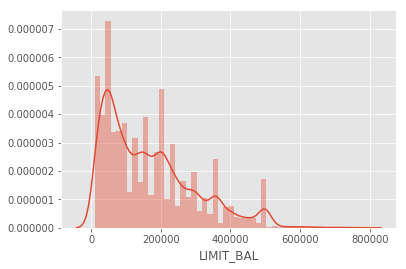

In [421]:
sns.distplot(credit[credit['LIMIT_BAL']<800000]['LIMIT_BAL'])

In [365]:
credit.to_csv('credit_model.csv', index = False)